In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

In [2]:
def lightUp():
  if space[position[0]][position[1]] != 255:
    space[position[0]][position[1]] = 100
  count[position[0]][position[1]] += 1

In [3]:
def f(pUp,pDown,pLeft,pRight):
    return pUp,pDown,pLeft,pRight

def get_Sliders(f):
  sliders = interactive(f, pUp=(0,1,.05)
                        ,pDown=(0,1,.05),pLeft=(0,1,.05)
                        ,pRight=(0,1,.05))
  display(sliders)
  return sliders

In [4]:
#The goal of thos function is to automate checking and 
#replacing sliders if they are not summed to one
#Currently does not work
def check_Probs(sliders,f):
  if sum(sliders.result) != 1:
    print("Probabilities fail, try again dummy")
    slidersNew = get_Sliders(f)


In [5]:
def get_Movement2():
  elements = ['Up', 'Down','Left','Right']
  probabilities = sliders.result
  choice = np.random.choice(elements, 1, p=probabilities)[0]
  return choice

In [6]:
def move(position):
  movement = get_Movement2()
  
  if movement == 'Up':
    if position[0] - 1 != 0:
      position[0] -= 1
    lightUp()
  
  elif movement == 'Down':
    if position[0] + 1 != n:
      position[0] += 1
    lightUp()
  
  elif movement == 'Left':
    if position[1] - 1 != 0:
      position[1] -= 1
    lightUp()
  
  else:
    if position[1] + 1 != m:
      position[1] += 1
    lightUp()

In [7]:
def gen_Space(n,m):
  steps = (n*m)//50 
  for i in range(steps):
    move(position)
  return space, count

In [8]:
def get_Mean():
  totalWalks = np.zeros(shape=(n,m))
  totalCount = np.zeros(shape=(n,m))
  for i in range(k):
    a,b = gen_Space(n,m)
    totalCount += a
    totalWalks += b
  meanWalk = totalWalks/k
  meanCount = totalCount/k
  return meanWalk,meanCount

In [46]:
#Dimensions of space
n = 100
m = 100

#Number of walks
k = 1

#Specify Probabilities
sliders = get_Sliders(f)


#Initialize Space and starting point
space = np.zeros(shape=(n,m))
count = np.zeros(shape=(n,m))
Xstart = n//2
Ystart = m//2
position = [Xstart,Ystart]

interactive(children=(FloatSlider(value=0.0, description='pUp', max=1.0, step=0.05), FloatSlider(value=0.0, de…

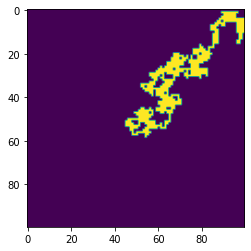

In [54]:
arr1, arr2 = get_Mean()
plt.imshow(arr2)